In [3]:
from utils.utils import *
from utils.metrics import * 
from utils.gnn import *
from utils.plots import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.LSTM import *

In [4]:
# with open("config.yaml", 'r') as file:
#             config_data = yaml.safe_load(file)
            
# dfs = dowload_tickers(config_data)

stocks = ["AAPL", "MSFT", "CMCSA", "COST", "QCOM", "ADBE", "SBUX", "INTU", "AMD", "INTC"]

dfs = {s: pd.read_csv(f"./prices/{s}_prices.csv", index_col=0, parse_dates=True) for s in stocks}

start_day    = "2025-01-01"

horizon_days = 50                           # cantidad de días hábiles a predecir
training_years = 2                         # años previos para entrenar y predecir cada día

models = ["LSTM", "LSTM+GNN"]

feat_cols = ["Close"]

# TRAINING
##########
results = {}
for model in models:
    results[model] = {}
    for stock in tqdm(stocks ,desc =f'Training stocks for model = {model}'):
        res = walk_forward_predict(     LSTMRegressor,
                                        dfs, 
                                        stock,
                                        start_day, 
                                        horizon_days,
                                        training_years=training_years,
                                        feat_cols=feat_cols,

                                        W=50,
                                        
                                        # lstm
                                        hidden_size=64, 
                                        num_layers=2, 
                                        dropout=0.005614,
                                        hit_coef=0.05,
                                        batch_size=8, 
                                        epochs=40, 
                                        lr=0.0031178,
                                        patience=5,
                                        
                                        torch_seed=0,
                                        model = model,
                                        tau_pear = 0.5,
                                        tau_lift = 1.0,
                                        alpha=0.5
                                    )
        results[model][stock] = res

Training stocks for model = LSTM+GNN: 100%|██████████| 10/10 [27:32<00:00, 165.23s/it]


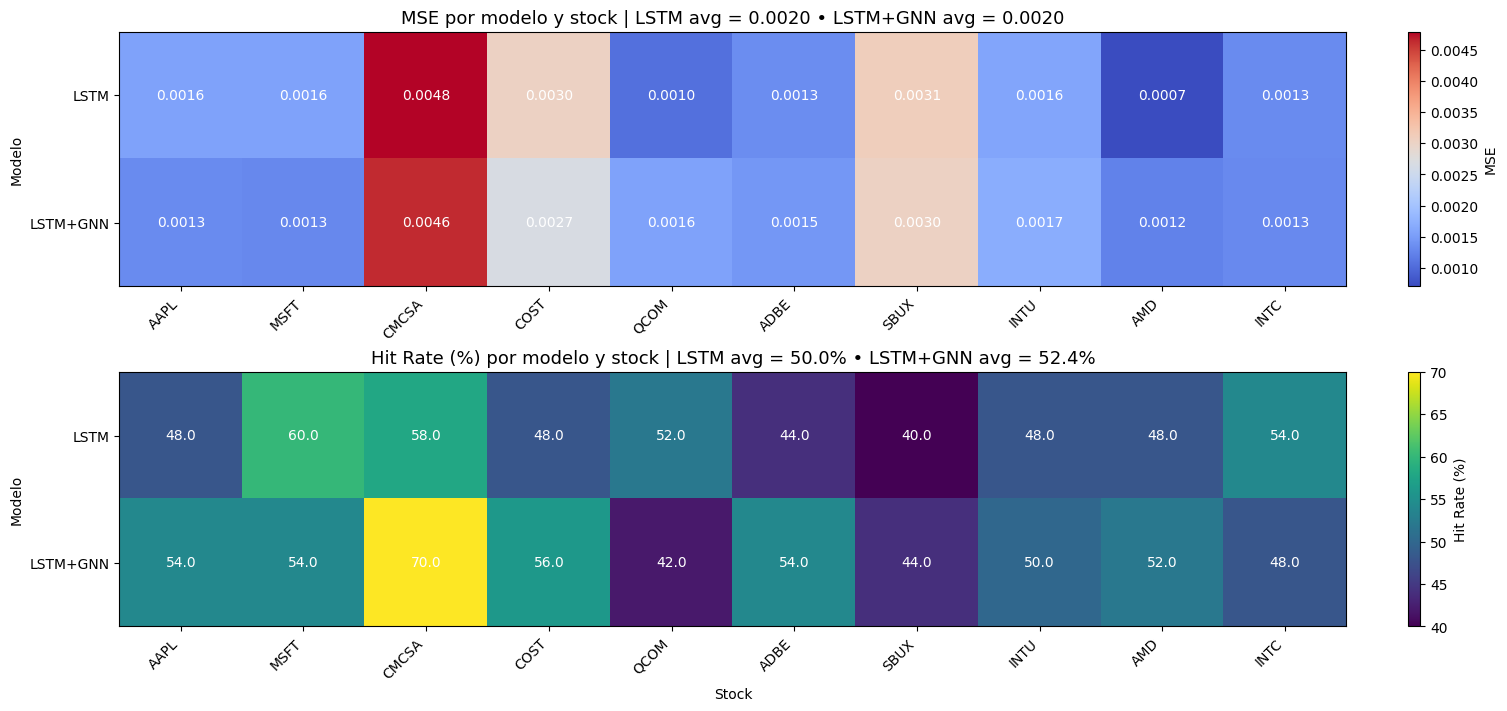

In [5]:
grid_mse_and_hit(results)